**Logistic Regression (For Classification Problem)**

**(Code: Subhajit Das)**

**What is Logistic Regression?**

Logistic Regression is a supervised machine learning algorithm mainly used for classification tasks where the goal is to predict the probability that an instance belongs to a given class. It is a kind of statistical algorithm, which analyzes the relationship between a set of independent variables and the dependent binary variables.

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

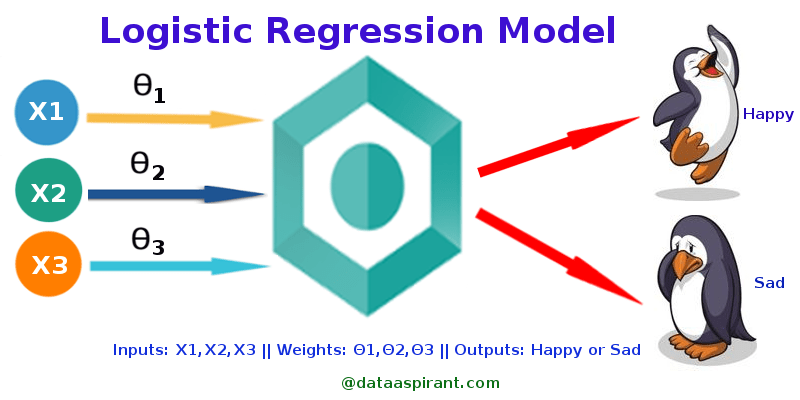

**Where we can use Logistic Regression:**

Logistic regression is commonly used in various fields to predict the likelihood of an event occurring. Here are some of the applications of logistic regression:

1. **Fraud Detection**: Logistic regression can be used to predict whether a transaction is fraudulent or not.

2. **Disease Prediction**: In healthcare, logistic regression can be used to predict the likelihood of a patient having a certain disease based on their symptoms.

3. **Churn Prediction**: In marketing and finance, logistic regression can be used to predict whether a customer will churn or not.

4. **Credit Scoring**: Logistic regression can be used to predict the probability of a customer defaulting on a loan.

5. **Spam Detection**: Logistic regression can be used to predict whether an email is spam or not.

6. **Customer Churn Prediction**: Logistic regression can be used to predict whether a customer will leave a service or continue to use it.

7. **Predicting Mortality in Injured Patients**: Logistic regression can be used to predict the likelihood of survival in injured patients.

8. **Artificial Neural Networks**: Logistic regression is the foundation for many advanced machine learning algorithms, including neural networks.

These are just a few examples. The use of logistic regression is vast and varied across different fields.

**Logistic Regression vs Linnear Regression**

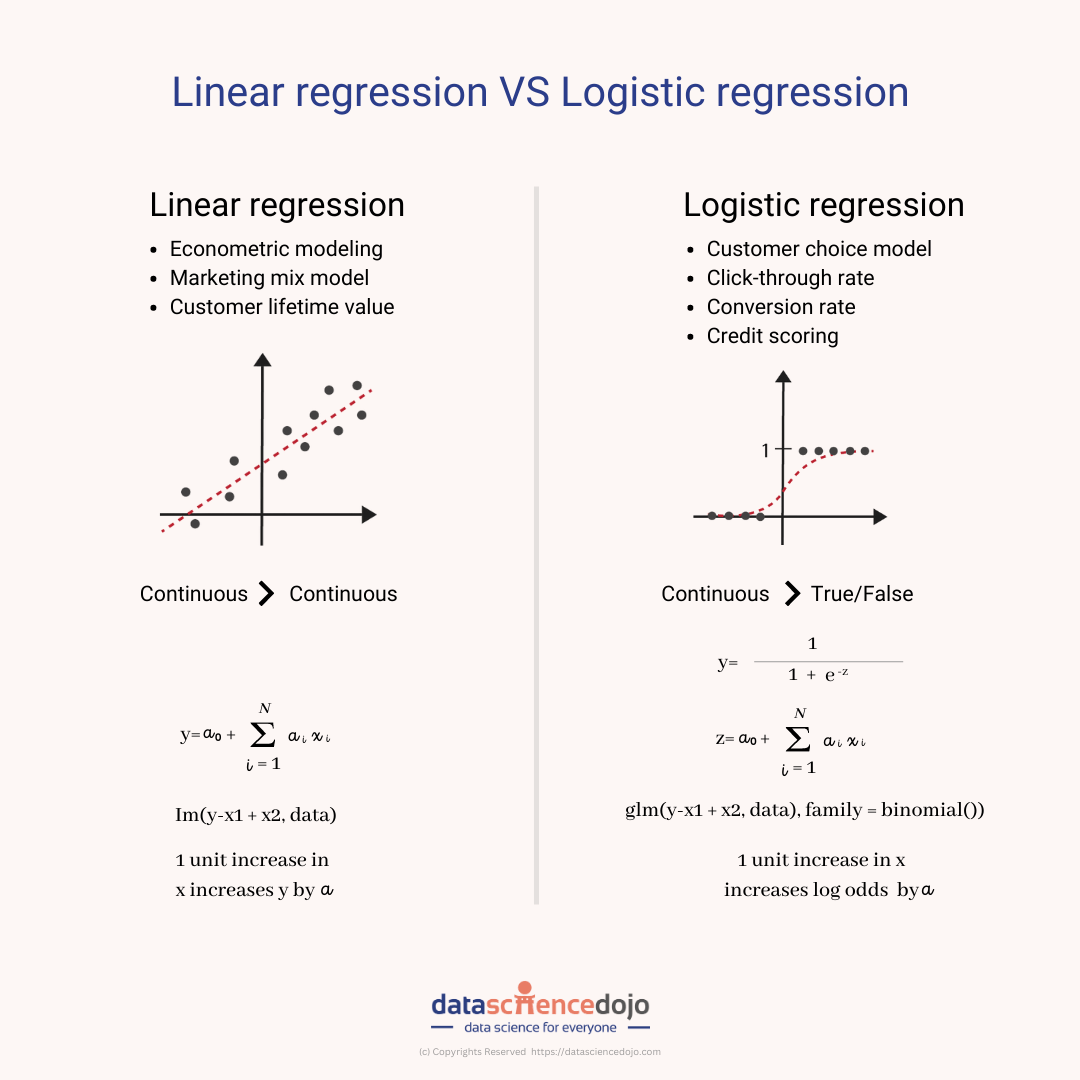

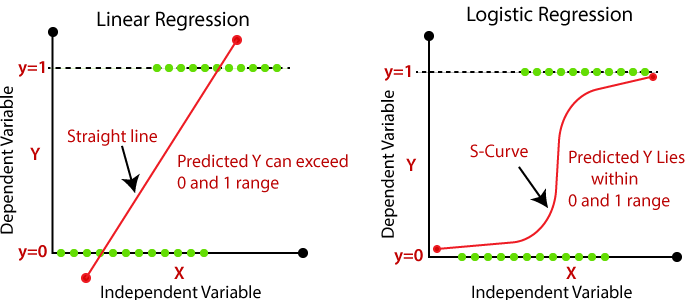

**How Logistic Regression works:**

1. **Binary Outcome**: Logistic regression is used when the dependent variable is binary (0/1, Yes/No, True/False) in nature.

2. **Logistic Function**: It uses a logistic function to transform this binary outcome into a continuous variable that can range between 0 and 1.

3. **Dependent Variable**: This continuous variable is used as the dependent variable in the regression analysis.

4. **Independent Variables**: The independent variables in the analysis are the factors that you think may influence the outcome.

5. **Estimating Effects**: The regression analysis estimates the effect of each independent variable on the probability of the outcome.

6. **Predicting Probability**: These estimates can then be used to predict the probability of the outcome given a set of values for the independent variables.

7. **Sigmoid Function**: The sigmoid function maps any real-valued number into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities.

8. **Decision Boundary**: Logistic Regression algorithm also uses a concept of threshold value. By default, the threshold value is 0.5 which means if the probability of an observation is greater than 0.5 then the observation is classified as Class-1(Y=1), else it is classified as Class-0(Y=0).

Remember, the goal of logistic regression is to find the best fitting model to describe the relationship between the dichotomous characteristic of interest and a set of independent variables.

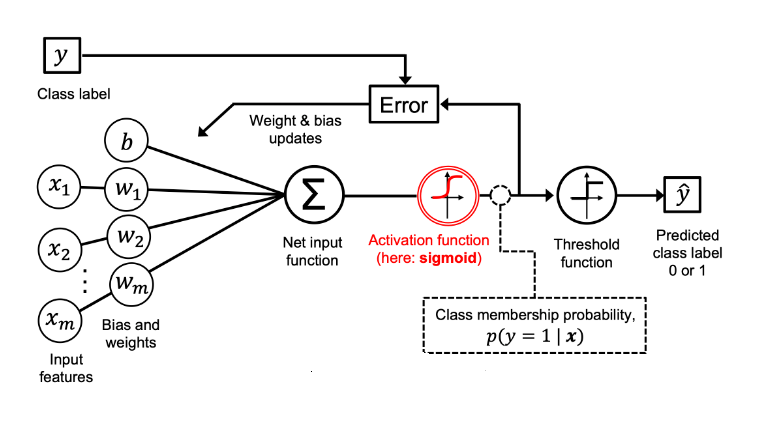

**Sigmoid Function in Logistic Regression:**

The Sigmoid Function is a crucial part of Logistic Regression in machine learning. It is a mathematical function that can take any real value and map it between 0 and 1, forming a curve shaped like the letter "S".

In Logistic Regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1). The curve from the logistic function indicates the likelihood of something such as whether the cells are cancerous or not, a mouse is obese or not based on its weight, etc.

The Sigmoid Function is used to map the predicted values to probabilities. It ensures that the value of the logistic regression must be between 0 and 1, which cannot go beyond this limit. This makes it a powerful tool for decision-making in classification tasks.

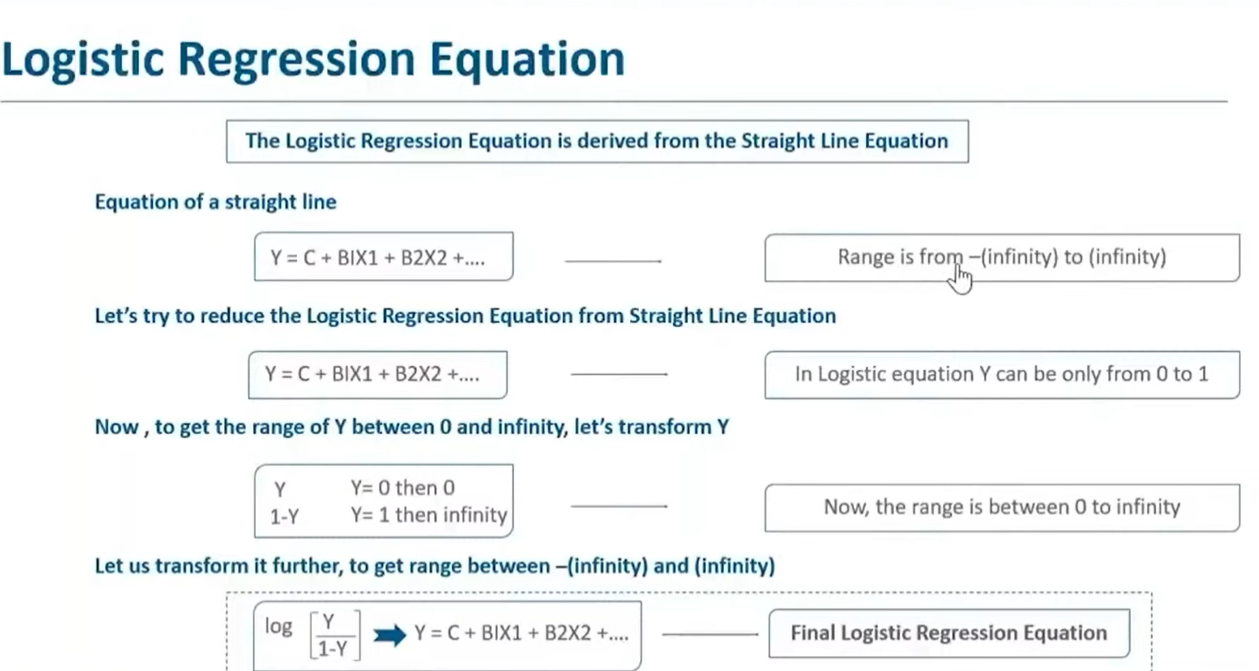

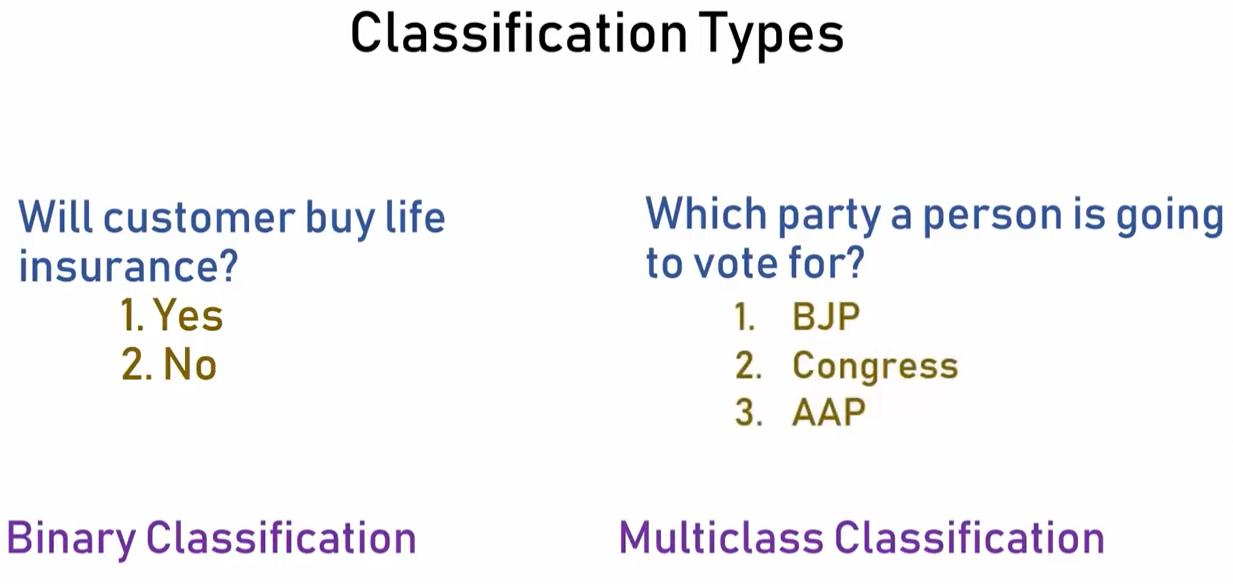

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **SUV Data Analysis**

In [2]:
suv_df = pd.read_csv("/content/drive/MyDrive/ML and DL DataSets/11_SUV_data.csv")
suv_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
suv_df.info

<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

**LabelEncoder (To convert Gender)**

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
Le = LabelEncoder()

In [6]:
suv_df['Gender'] = Le.fit_transform(suv_df['Gender'])
suv_df['Gender'].head(8)

0    1
1    1
2    0
3    0
4    1
5    1
6    0
7    0
Name: Gender, dtype: int64

**Separating features and labels**

In [7]:
x = suv_df.drop(['User ID', 'Purchased'], axis = 1)
x

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [8]:
y = suv_df['Purchased']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

**Spliting train and test datasets**

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [11]:
# length or sample of train dataset
len(x_train)

280

In [12]:
# length or sample of test dataset
len(x_test)

120

**Using Logistic Regression**

**Parameters used in Logistic Regression:**

The parameters used in Logistic Regression include:

1. **Explanatory Variables**: These are the independent variables or predictors in the model.
2. **Response Variable**: This is the dependent variable that we are trying to predict.
3. **Logistic Function**: This is the formula used to represent how the independent and dependent variables relate to one another.
4. **penalty**: This specifies the norm used in the penalization.
5. **dual**: This is a boolean parameter that decides whether to solve the primal or dual optimization problem.
6. **tol**: This is the tolerance for stopping criteria.
7. **C**: This is the inverse of regularization strength.
8. **fit_intercept**: This specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
9. **intercept_scaling**: This is useful only when the solver ‘liblinear’ is used and self.fit_intercept is set to True.
10. **class_weight**: This is an optional parameter that represents weights associated with classes.
11. **random_state**: This parameter is used for shuffling the data.
12. **solver**: This parameter specifies the algorithm to use in the optimization problem.
13. **max_iter**: This is the maximum number of iterations for the solver to converge.
14. **multi_class**: This parameter specifies if the algorithm should use a one-vs-rest or multinomial approach.
15. **verbose**: This is used for the verbosity of the output.
16. **warm_start**: This is a boolean parameter that decides whether to reuse the solution of the previous call to fit as initialization.
17. **n_jobs**: This is the number of CPU cores used during the cross-validation loop.
18. **l1_ratio**: This parameter is used only when penalty is 'elasticnet'.

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
log = LogisticRegression()

In [15]:
# Fit the model
log.fit(x_train, y_train)

LogisticRegression()

In [16]:
y_test.head(8)

208    1
227    1
268    1
9      0
327    0
119    0
134    0
349    0
Name: Purchased, dtype: int64

In [17]:
y_pred = log.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0]


**Metrices used in Linear Regression:**

There are several metrics that can be used to evaluate the performance of a Logistic Regression model:

1. **Accuracy**: This is the ratio of the total number of correct predictions to the total number of input samples.

2. **Precision**: This is the ratio of the total number of correct positive predictions to the total number of positive predictions.

3. **Recall (Sensitivity)**: This is the ratio of the total number of correct positive predictions to the total number of actual positives.

4. **F1-Score**: This is the Harmonic Mean of Precision and Recall.

5. **AUC-ROC (Area Under the Receiver Operating Characteristics Curve)**: This is a performance measurement for classification problem at various thresholds settings.

6. **Confusion Matrix**: A table used to describe the performance of a classification model.

7. **Log-Loss**: It's a performance metric for evaluating the predictions of probabilities of membership to a particular class.

8. **AIC (Akaike Information Criteria)**: It's a method used to compare different models and find out the best fitting model from the given different models.

9. **Null Deviance and Residual Deviance**: These are measures of goodness of fit for a logistic regression model.

10. **Mean Absolute Error (MAE)**: This is the mean of the absolute value of the errors.

11. **Root Mean Square Error (RMSE)**: This is the square root of the average of squared differences between prediction and actual observation.

12. **Coefficient of Determination or R2**: This metric provides an indication of the goodness of fit of a set of predictions to the actual values.

13. **Adjusted R2**: This is a modified version of R-squared that has been adjusted for the number of predictors in the model.

Remember, the choice of metric depends on your specific problem and the business context. It's always a good idea to understand the assumptions and implications of each metric before choosing one.

**Viewing the prediction score**

In [18]:
log.score(x_test, y_test)

0.65

In [19]:
from sklearn import metrics

# Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Precision
precision = metrics.precision_score(y_test, y_pred, zero_division=0) # The zero_division parameter controls the behavior when there is a division by zero.
print(f'Precision: {precision}') # 0, means that out of all the positive predictions your model made, none of them were actually positive

# Recall
recall = metrics.recall_score(y_test, y_pred)
print(f'Recall: {recall}') # 0, means that out of all the positive predictions your model made, none of them were actually positive

# F1 Score
f1_score = metrics.f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score}') # F1 score is the harmonic mean of precision and recall.

# AUC-ROC
auc_roc = metrics.roc_auc_score(y_test, y_pred)
print(f'AUC-ROC: {auc_roc}')

# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: \n{confusion_matrix}')
print()

# Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}') # 0.4167, means that on average, your model’s predictions are 0.4167 units away from the actual values.

# Root Mean Square Error (RMSE)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}') # 0.6455, means that on average, the square root of the squared differences between the predictions and the actual values is 0.6455.

# R2 Score
r2 = metrics.r2_score(y_test, y_pred) # R2 score of 1 indicates that the model explains all the variability of the response data around its mean.
print(f'R2 Score: {r2}') # A negative R2 score indicates that your model is performing worse than a horizontal line

# Adjusted R2 Score
n = len(y_test)  # Number of observations
k = 1  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print(f'Adjusted R2 Score: {adjusted_r2}') # A negative R2 score indicates that your model is performing worse than a horizontal line

Accuracy: 0.65
Precision: 0.3333333333333333
Recall: 0.07692307692307693
F1 Score: 0.125
AUC-ROC: 0.5014245014245013
Confusion Matrix: 
[[75  6]
 [36  3]]

MAE: 0.35
RMSE: 0.5916079783099616
R2 Score: -0.5954415954415957
Adjusted R2 Score: -0.6089622869283888


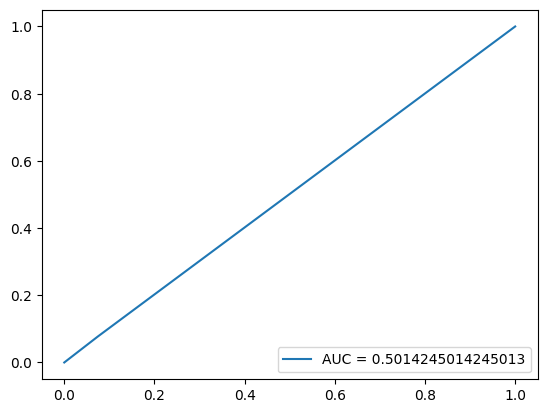

In [20]:
# Printing AUC-ROC Curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred) # '_' This will prevent the error of "Too much unpack values"
# In Python, the underscore _ is often used as a “throwaway” variable to indicate that you don’t plan to use that value.
auc = metrics.roc_auc_score(y_test, y_pred)

plt.plot(fpr, # Increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i]
         tpr, # Increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i]
         label="AUC = "+str(auc))
plt.legend(loc=4)
plt.show()

**Predict Purchased**

In [21]:
log_gender = LabelEncoder()
categories = ['Male', 'Female']
log_gender.fit(categories)

LabelEncoder()

In [22]:
purchase_predict = LabelEncoder()
categories = ['Yes', 'No']
purchase_predict.fit(categories)

LabelEncoder()

In [23]:
age = int(input("Enter the Age: "))

gender = input("Enter the Gender: ")
gender_var = log_gender.transform([gender])[0] # The [0] at the end is an indexing operation that gets the first element from the output of the transform method

salary = int(input("Enter the Salary: "))

label_map = {0: 'No', 1: 'Yes'}
predict_value = log.predict([[age, gender_var, salary]])

# Map the numerical prediction back to a string label
label_value = label_map[predict_value[0]]

print(label_value) # 0: 'Yes', 1: 'No'

Enter the Age: 21
Enter the Gender: Male
Enter the Salary: 35000
Yes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
